## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Paths

In [ ]:
base_dir = '/content/drive/MyDrive/Image classification/dataset'

train_dir = '/content/drive/MyDrive/Image classification/dataset/train'
train_street_dir = '/content/drive/MyDrive/Image classification/dataset/train/street'
train_sea_dir = '/content/drive/MyDrive/Image classification/dataset/train/sea'
train_mountain_dir = '/content/drive/MyDrive/Image classification/dataset/train/mountain'
train_glacier_dir = '/content/drive/MyDrive/Image classification/dataset/train/glacier'
train_forest_dir = '/content/drive/MyDrive/Image classification/dataset/train/forest'
train_buildings_dir = '/content/drive/MyDrive/Image classification/dataset/train/buildings'

test_dir = '/content/drive/MyDrive/Image classification/dataset/test'
test_street_dir = '/content/drive/MyDrive/Image classification/dataset/test/street'
test_sea_dir = '/content/drive/MyDrive/Image classification/dataset/test/sea'
test_mountain_dir = '/content/drive/MyDrive/Image classification/dataset/test/mountain'
test_glacier_dir = '/content/drive/MyDrive/Image classification/dataset/test/glacier'
test_forest_dir = '/content/drive/MyDrive/Image classification/dataset/test/forest'
test_buildings_dir = '/content/drive/MyDrive/Image classification/dataset/test/buildings'

validation_dir = '/content/drive/MyDrive/Image classification/dataset/validation'
validation_street_dir = '/content/drive/MyDrive/Image classification/dataset/validation/street'
validation_sea_dir = '/content/drive/MyDrive/Image classification/dataset/validation/sea'
validation_mountain_dir = '/content/drive/MyDrive/Image classification/dataset/validation/mountain'
validation_glacier_dir = '/content/drive/MyDrive/Image classification/dataset/validation/glacier'
validation_forest_dir = '/content/drive/MyDrive/Image classification/dataset/validation/forest'
validation_buildings_dir = '/content/drive/MyDrive/Image classification/dataset/validation/buildings'

In [ ]:
num_street_train = len(os.listdir(train_street_dir))
num_sea_train = len(os.listdir(train_sea_dir))
num_mountain_train = len(os.listdir(train_mountain_dir))
num_glacier_train = len(os.listdir(train_glacier_dir))
num_forest_train = len(os.listdir(train_forest_dir))
num_buildings_train = len(os.listdir(train_buildings_dir))
total_train = num_street_train + num_sea_train + num_mountain_train + num_glacier_train + num_forest_train + num_buildings_train


num_street_test = len(os.listdir(test_street_dir))
num_sea_test = len(os.listdir(test_sea_dir))
num_mountain_test = len(os.listdir(test_mountain_dir))
num_glacier_test = len(os.listdir(test_glacier_dir))
num_forest_test = len(os.listdir(test_forest_dir))
num_buildings_test = len(os.listdir(test_buildings_dir))
total_test = num_street_test + num_sea_test + num_mountain_test + num_glacier_test + num_forest_test + num_buildings_test


num_street_validation = len(os.listdir(validation_street_dir))
num_sea_validation = len(os.listdir(validation_sea_dir))
num_mountain_validation = len(os.listdir(validation_mountain_dir))
num_glacier_validation = len(os.listdir(validation_glacier_dir))
num_forest_validation = len(os.listdir(validation_forest_dir))
num_buildings_validation = len(os.listdir(validation_buildings_dir))
total_validation = num_street_validation + num_sea_validation + num_mountain_validation + num_glacier_validation + num_forest_validation + num_buildings_validation

## count

In [ ]:
print("Number of street images in train:", num_street_train)
print("Number of sea images in train:", num_sea_train)
print("Number of mountain images in train:", num_mountain_train)
print("Number of glacier images in train:", num_glacier_train)
print("Number of forest images in train:", num_forest_train)
print("Number of buildings images in train:", num_buildings_train)
print("Total of images in train:", total_train)

print("Number of street images in test:", num_street_test)
print("Number of sea images in test:", num_sea_test)
print("Number of mountain images in test:", num_mountain_test)
print("Number of glacier images in test:", num_glacier_test)
print("Number of forest images in test:", num_forest_test)
print("Number of buildings images in test:", num_buildings_test)
print("Total of images in test:", total_test)

print("Number of street images in validation:", num_street_validation)
print("Number of sea images in validation:", num_sea_validation)
print("Number of mountain images in validation:", num_mountain_validation)
print("Number of glacier images in validation:", num_glacier_validation)
print("Number of forest images in validation:", num_forest_validation)
print("Number of buildings images in validation:", num_buildings_validation)
print("Total of images in validation:", total_validation)

Number of street images in train: 312
Number of sea images in train: 464
Number of mountain images in train: 488
Number of glacier images in train: 491
Number of forest images in train: 487
Number of buildings images in train: 466
Total of images in train: 2708
Number of street images in test: 300
Number of sea images in test: 200
Number of mountain images in test: 208
Number of glacier images in test: 146
Number of forest images in test: 300
Number of buildings images in test: 300
Total of images in test: 1454
Number of street images in validation: 138
Number of sea images in validation: 129
Number of mountain images in validation: 126
Number of glacier images in validation: 210
Number of forest images in validation: 138
Number of buildings images in validation: 120
Total of images in validation: 861


## configuration

In [ ]:
IMG_SHAPE  = 224
batch_size = 32

## preprocess data (train, test, validation)

In [ ]:
image_gen_train = ImageDataGenerator(rescale = 1./255)

train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size, directory = train_dir,
shuffle= True,target_size = (IMG_SHAPE,IMG_SHAPE), class_mode = 'categorical')

image_generator_validation = ImageDataGenerator(rescale=1./255)
val_data_gen = image_generator_validation.flow_from_directory(batch_size=batch_size, directory=validation_dir,
target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='categorical')

image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size, directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE), class_mode='categorical')

Found 2708 images belonging to 6 classes.
Found 861 images belonging to 6 classes.
Found 1454 images belonging to 6 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

## download VGG-16 weights

We know VGG-16 is trained with many classes, so if we use (top_layer = True), then we need to retrain it on all classes at which VGG-16 trained, but if we use (top_layer = False), then in retraining, we only need to add our training classes.

In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

58889256/58889256 [==============================] - 1s 0us/step


Now, we need to freeze the training layers of VGG-16. (because VGG-16, is already trained on huge data).

In [ ]:
for layer in pre_trained_model.layers:
  # print(layer.name)
  layer.trainable = False

In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

Now, we need to merge the original VGG-16 layers, with our custom layers.

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

for “Multiclass classification”, change the loss with categorical_crossentropy.

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Train the model

In [ ]:
print(tf.config.list_physical_devices('GPU'))
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
callbacks = myCallback()
history = model.fit_generator(
            generator=train_data_gen,
            validation_data = val_data_gen,
            steps_per_epoch =(total_train//batch_size),
            epochs = 100,
            validation_steps = (total_validation//batch_size),
            verbose = 1,
            callbacks=[callbacks])

<ipython-input-16-199fd3964fc2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
84/84 [==============================] - 1081s 13s/step - loss: 0.9868 - acc: 0.6211 - val_loss: 0.6139 - val_acc: 0.7740
Epoch 2/100
84/84 [==============================] - 15s 180ms/step - loss: 0.5886 - acc: 0.7754 - val_loss: 0.5475 - val_acc: 0.7861
Epoch 3/100
84/84 [==============================] - 15s 182ms/step - loss: 0.5160 - acc: 0.8061 - val_loss: 0.5078 - val_acc: 0.8089
Epoch 4/100
84/84 [==============================] - 17s 201ms/step - loss: 0.4559 - acc: 0.8285 - val_loss: 0.4802 - val_acc: 0.8257
Epoch 5/100
84/84 [==============================] - 15s 178ms/step - loss: 0.4131 - acc: 0.8475 - val_loss: 0.6244 - val_acc: 0.7536
Epoch 6/100
84/84 [==============================] - 17s 196ms/step - loss: 0.3987 - acc: 0.8494 - val_loss: 0.4675 - val_acc: 0.8281
Epoch 7/100
84/84 [==============================] - 17s 198ms/step - loss: 0.3711 - acc: 0.8591 - val_loss: 0.5041 - val_acc: 0.8209
Epoch 8/100
84/84 [==============================] - 15s 182ms

In [ ]:
# vgg_classifier = model.fit(train_data_gen,
# steps_per_epoch=(total_train//batch_size), epochs = 60, validation_data=val_data_gen,
# validation_steps=(total_validation//batch_size),batch_size = batch_size, verbose = 1)

## Evaluate the model

In [ ]:
result = model.evaluate(test_data_gen,batch_size=batch_size)
print("test_loss, test accuracy", result)

46/46 [==============================] - 431s 10s/step - loss: 0.7130 - acc: 0.8329
test_loss, test accuracy [0.713046133518219, 0.8328748345375061]


In [ ]:
print(test_data_gen.class_indices)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


1/1 [==============================] - 2s 2s/step


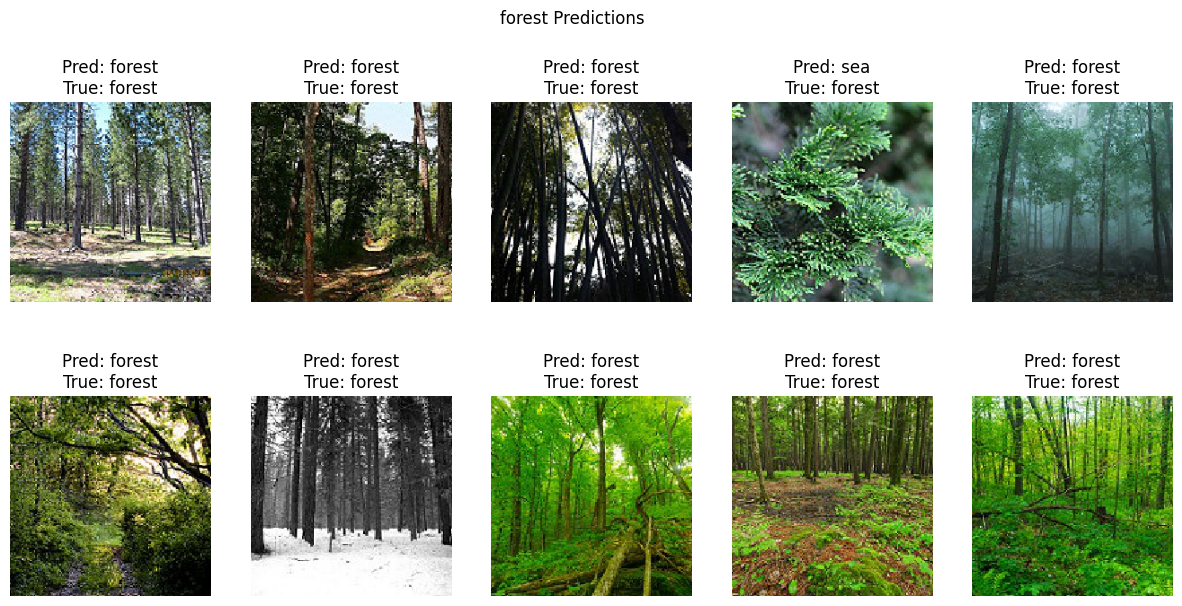

1/1 [==============================] - 0s 43ms/step


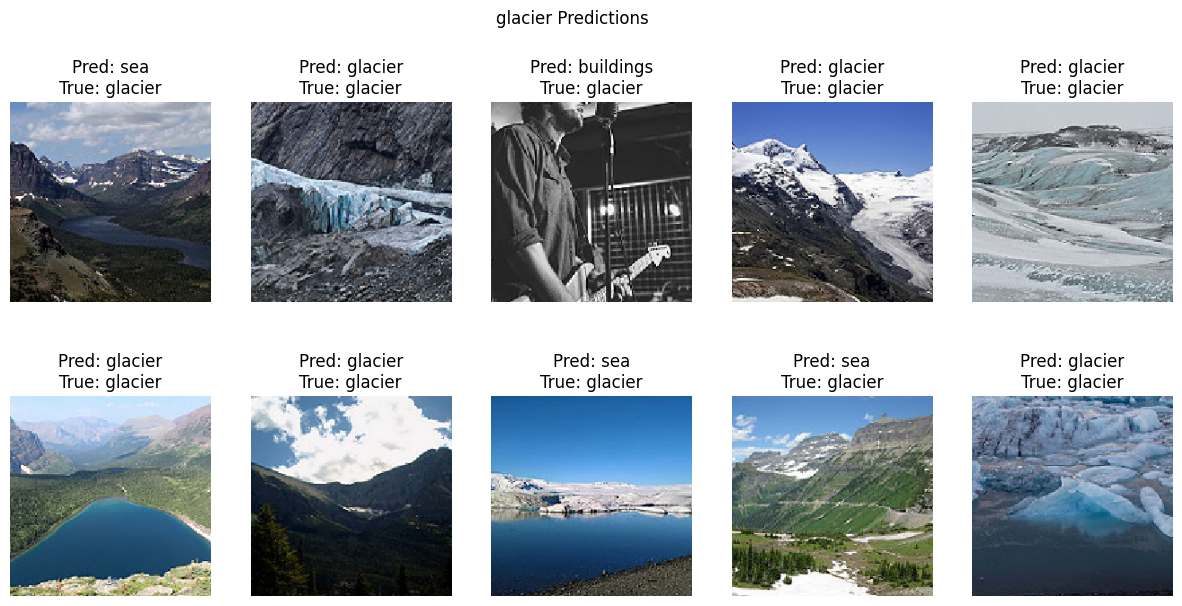

1/1 [==============================] - 0s 39ms/step


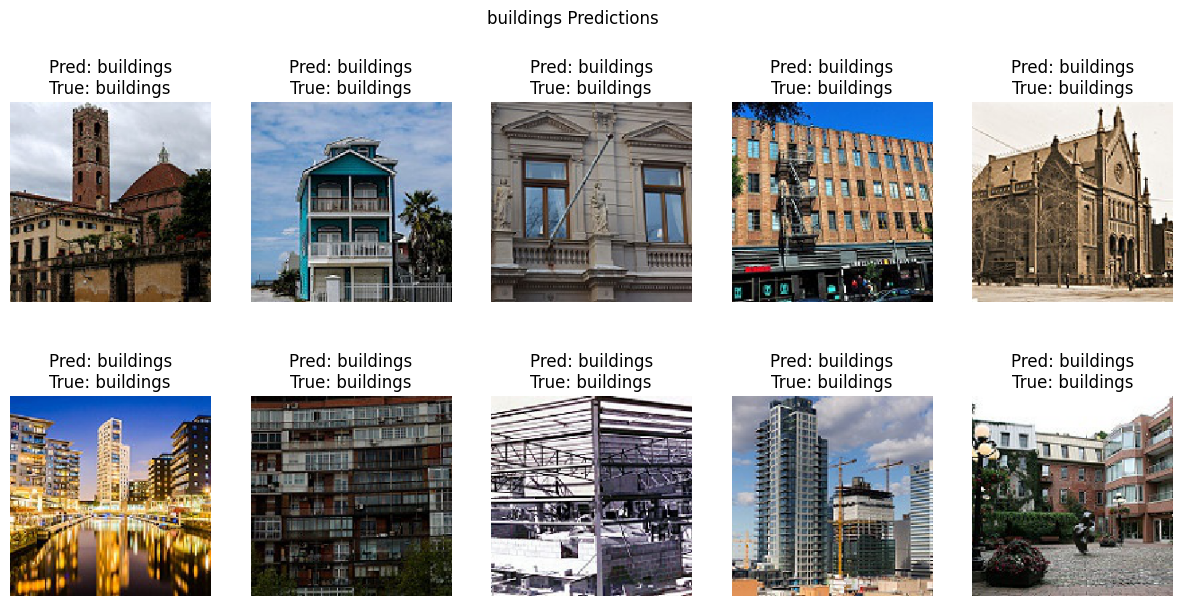

1/1 [==============================] - 0s 21ms/step


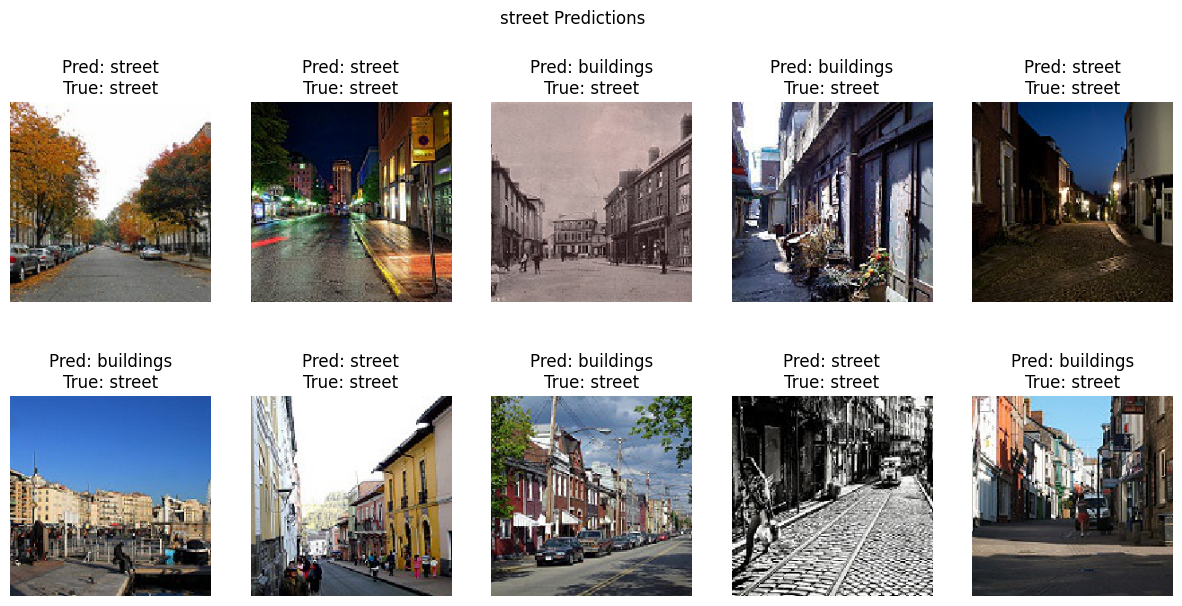

1/1 [==============================] - 0s 30ms/step


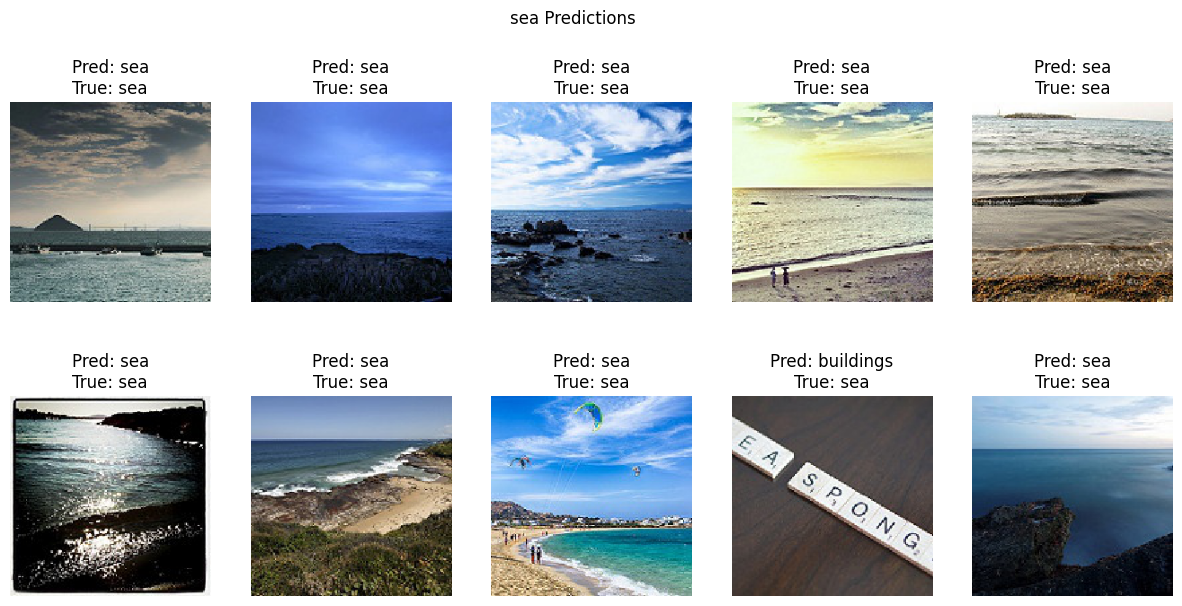

1/1 [==============================] - 0s 27ms/step


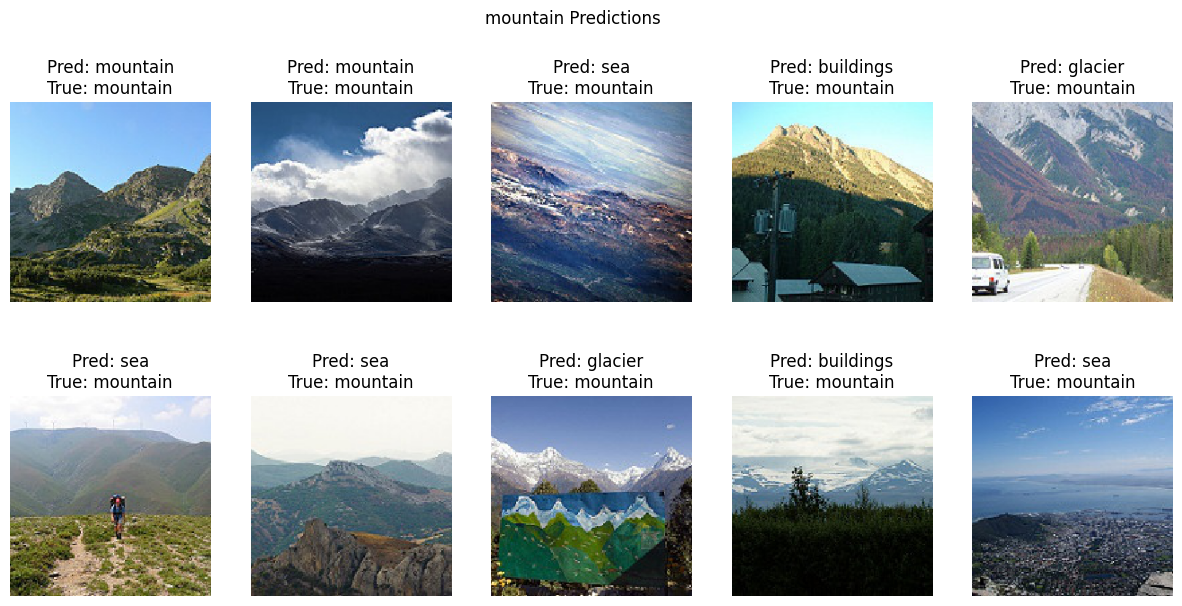

In [ ]:
true_classes = test_data_gen.classes
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_indices = test_data_gen.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

from tensorflow.keras.preprocessing import image

# Define the number of images to plot per class
num_images = 10


# Loop over the class directories in the test directory
for class_dir in os.listdir(test_dir):
    if class_dir in class_names:
        # Load the first num_images images from the current class directory
        images = []
        filenames = os.listdir(os.path.join(test_dir, class_dir))
        for i in range(num_images):
            img_path = os.path.join(test_dir, class_dir, filenames[i])
            img = image.load_img(img_path, target_size=(224, 224))
            images.append(np.array(img))
        images = np.array(images)

        # Get the true labels for the images
        true_labels = [class_indices[test_data_gen.class_indices[class_dir]]] * num_images

        # Make predictions on the images
        preds = model.predict(images)
        pred_labels = [class_indices[np.argmax(pred)] for pred in preds]

        # Plot the images with their predicted labels
        fig, axs = plt.subplots(2, 5, figsize=(15, 7))
        fig.suptitle(f'{class_dir} Predictions')
        for i in range(num_images):
            axs[i//5, i%5].imshow(images[i])
            axs[i//5, i%5].set_title(f'Pred: {pred_labels[i]}\nTrue: {true_labels[i]}')
            axs[i//5, i%5].axis('off')
        plt.show()

## Save the model


In [ ]:
model_json = model.to_json()
with open("/content/drive/MyDrive/Image classification/VGG_Classifier.json", "w") as json_file:json_file.write(model_json)

model.save("/content/drive/MyDrive/Image classification/VGG_Classifier.h5")
print("Saved model to disk")

model.save_weights("/content/drive/MyDrive/Image classification/VGG_weights.h5")

Saved model to disk


In [ ]:
model = tf.keras.saving.load_model(
    "/content/drive/MyDrive/Image classification/VGG_Classifier.h5", custom_objects=None, compile=True, safe_mode=True
)